# CNN


In [23]:
# Bibliotheken
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

from time import time

import matplotlib.pyplot as plt
import time

from mlxtend.data import loadlocal_mnist

from matplotlib import *
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt



In [10]:
# Trainingsparameter
batch_size = 128
num_classes = 10
epochs = 100


In [11]:
# Bilddimensionen
img_rows , img_cols = 28 , 28
input_size = img_rows * img_cols

In [12]:
# Laden der Daten
x_train, y_train = loadlocal_mnist(
        images_path='./Data/train-images.idx3-ubyte', 
        labels_path='./Data/train-labels.idx1-ubyte')
x_test, y_test = loadlocal_mnist(
        images_path='./Data/t10k-images.idx3-ubyte', 
        labels_path='./Data/t10k-labels.idx1-ubyte')

In [13]:
# Bearbeite X_Values = Bilder
x_train = x_train . reshape ( x_train . shape [0] , input_size )
x_test = x_test . reshape ( x_test . shape [0] , input_size )
x_train = x_train . astype ('float32')
x_test = x_test . astype ('float32')
x_train /= 255
x_test /= 255

In [14]:
# Datenkonvertierung 2: Y-Werte (Klassenvektoren => Binäre Klassenmatrizen)
y_train = keras.utils.to_categorical(y_train ,num_classes)
y_test = keras.utils.to_categorical(y_test , num_classes)

In [46]:
# Modellparameter
cnn_clf=Sequential()
cnn_clf.add(Dense(256,activation='relu',input_shape=(input_size,)))
cnn_clf.add(Dense(128,activation='relu'))
cnn_clf.add(Dense(num_classes,activation='softmax'))
cnn_clf.summary()
cnn_clf.compile(loss='categorical_crossentropy',optimizer=RMSprop(),
metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Fit das Model, für speichern
cnn_clf.fit(x_train,y_train,batch_size=batch_size,
                  epochs=epochs,verbose=2,validation_data=(x_test,y_test),
                  callbacks=[EarlyStopping(min_delta=0.00001,patience=10)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 3s - loss: 0.2637 - accuracy: 0.9203 - val_loss: 0.1223 - val_accuracy: 0.9610
Epoch 2/100
 - 3s - loss: 0.1045 - accuracy: 0.9687 - val_loss: 0.0982 - val_accuracy: 0.9678
Epoch 3/100
 - 3s - loss: 0.0698 - accuracy: 0.9781 - val_loss: 0.0713 - val_accuracy: 0.9773
Epoch 4/100
 - 3s - loss: 0.0517 - accuracy: 0.9837 - val_loss: 0.0698 - val_accuracy: 0.9785
Epoch 5/100
 - 3s - loss: 0.0387 - accuracy: 0.9876 - val_loss: 0.0648 - val_accuracy: 0.9821
Epoch 6/100
 - 3s - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.0779 - val_accuracy: 0.9771
Epoch 7/100
 - 3s - loss: 0.0240 - accuracy: 0.9930 - val_loss: 0.0752 - val_accuracy: 0.9794
Epoch 8/100
 - 3s - loss: 0.0195 - accuracy: 0.9942 - val_loss: 0.0723 - val_accuracy: 0.9801
Epoch 9/100
 - 3s - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.0811 - val_accuracy: 0.9797
Epoch 10/100
 - 3s - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.1148 - val_accuracy: 0.9716
Epoch 11/

In [17]:
#Training
import time
start_time=time.time()

history=cnn_clf.fit(x_train,y_train,batch_size=batch_size,
                  epochs=epochs,verbose=2,validation_data=(x_test,y_test),
                  callbacks=[EarlyStopping(min_delta=0.00001,patience=10)])

end_time=time.time()
print("Zeitdauer[s]:{}".format((end_time-start_time)))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 3s - loss: 0.2588 - accuracy: 0.9216 - val_loss: 0.1320 - val_accuracy: 0.9592
Epoch 2/100
 - 3s - loss: 0.1019 - accuracy: 0.9685 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 3/100
 - 3s - loss: 0.0677 - accuracy: 0.9792 - val_loss: 0.1030 - val_accuracy: 0.9685
Epoch 4/100
 - 3s - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0657 - val_accuracy: 0.9793
Epoch 5/100
 - 3s - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0736 - val_accuracy: 0.9793
Epoch 6/100
 - 3s - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0803 - val_accuracy: 0.9796
Epoch 7/100
 - 3s - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0780 - val_accuracy: 0.9810
Epoch 8/100
 - 3s - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0839 - val_accuracy: 0.9796
Epoch 9/100
 - 3s - loss: 0.0141 - accuracy: 0.9959 - val_loss: 0.0828 - val_accuracy: 0.9800
Epoch 10/100
 - 3s - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0915 - val_accuracy: 0.9806
Epoch 11/

In [25]:
# Test / Validierung
loss ,acc = model.evaluate (x_test , y_test ,verbose =0)
print ("Loss : {}".format(loss))
print ("Genauigkeit [%]: {}".format(acc *100))


Loss : 0.10943023085752486
Genauigkeit [%]: 98.01999926567078


C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'lower right '. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


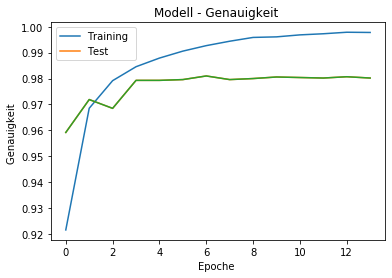

In [44]:
# Visualisierung: Genauigkeit
plt . plot ( history . history ['accuracy'])
plt . plot ( history . history ['val_accuracy'])
plt . title ('Modell - Genauigkeit ')
plt . plot ( history . history ['val_accuracy'])
plt . title ('Modell - Genauigkeit ')
plt . ylabel ('Genauigkeit ')
plt . xlabel ('Epoche ')
plt . legend ([ 'Training ', 'Test '] , loc='lower right ')
plt . show ()


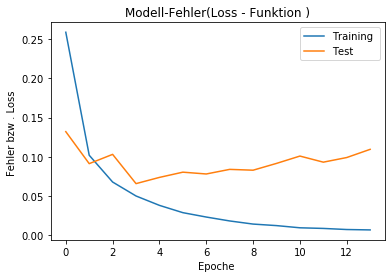

In [30]:
# Visualisierung: Fehler (Loss-Funktion)
plt.plot(history.history ['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modell-Fehler(Loss - Funktion )')
plt . ylabel ('Fehler bzw . Loss ')
plt . xlabel ('Epoche ')
plt . legend ([ 'Training ', 'Test '] , loc='upper right')
plt . show ()